<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21619" size=6px>                   
                    <b>  Car Price Prediction 
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=4.5px>                   
                    <b>  
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=2px>                                      
                    <b> 
                    <br>    
                    </b>
                </font>
            </div>
            <div align="center">
                <font color="#21619" size=4px>                   
                    <b>  Machine Learning Model Building 
                    </b>
                </font>
            </div>
         </td>
    </tr>
</table>

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4.8px>                   
                    <b>  Author 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

* Praveen R


<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Problem Statement  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

An Indian automobile company Car Dekho aims to enhance customer experience and streamline the 
pricing process by leveraging machine learning.

They have engaged their Data Scientists to understand the factor on which the price of cars 
depends. Specifically, they want to understand the factors affecting the pricing of cars. 

The company wants to know:

● Which variables are significant in predicting the price of a car.

● How well those variables describe the price of a car.

There is historical data available on used car prices from CarDekho, including various features such as make,
model, year, fuel type, transmission type, and other relevant attributes from different cities

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Objective  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

The objective is to provide Geely Auto with a data-driven understanding of the key variables that impact car pricing in the US market and to guide them in making informed decisions about market entry, product features, pricing strategies, and competitive positioning.

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=4px>                   
                    <b>  Regression Models
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

* **Linear Regression**
* **Decision Tree Regressor**
* **Gradient Boosting Regressor**
* **Random Forest Regressor**

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=6px>                   
                    <b>  Import Libraries
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Convert String to Dictionary
import ast

# Standard System Lubraires
import os
import time

# Encoder and Scaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# For Pickle File
import joblib

# Splitting Datasets, Cross Validation and Hyperparameter Tuning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Regression Algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Evaluation and Imputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=6px>                   
                    <b>  Convert Unstructured Data to Structured
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
# Flatten Nested JSON data
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                if isinstance(item, dict):
                    items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items())
                else:
                    items.append((f'{new_key}_{i}', item))
        else:
            items.append((new_key, v))
    return dict(items)

##### Bangalore

* Bangalore_Cars Unstructured to Structured 

In [3]:
import pandas as pd
import ast

# Load your Excel file
input_excel_path = r"C:\Users\bhara\CarDheko\bangalore_cars.xlsx"

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(input_excel_path, engine='openpyxl')

output_csv_path = r"C:\Users\bhara\CarDheko\structured\bangalore_cars.csv"

# Process 'new_car_detail' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_detail']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_details_df = pd.DataFrame(flattened_data)

# Process 'new_car_overview' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_overview']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_overview_df = pd.DataFrame(flattened_data)

# Process 'new_car_feature' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_feature']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_features_df = pd.DataFrame(flattened_data)

# Process 'new_car_specs' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_specs']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_specs_df = pd.DataFrame(flattened_data)

# Process 'car_links' column (if not a nested structure, just copy as is)
structured_links_df = df[['car_links']].copy()

# Merge all structured DataFrames into one
bangalore_cars_Structured = pd.concat([structured_details_df, structured_overview_df, structured_features_df, structured_specs_df, structured_links_df], axis=1)

# Add the 'City' column
# Assign the city name to all rows; you can change 'YourCityName' to the desired city name
bangalore_cars_Structured['City'] = 'Bangalore'

# Save the merged DataFrame to a CSV file
bangalore_cars_Structured.to_csv(output_csv_path, index=False)

# Display the merged DataFrame
print(bangalore_cars_Structured)


      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback  1,20,000       Manual        3  3rd Owner   
1      0  Petrol        SUV    32,706       Manual        2  2nd Owner   
2      0  Petrol  Hatchback    11,949       Manual        1  1st Owner   
3      0  Petrol      Sedan    17,794       Manual        1  1st Owner   
4      0  Diesel        SUV    60,000       Manual        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1476   0  Diesel        SUV  1,56,039       Manual        2  2nd Owner   
1477   0  Petrol      Sedan    56,000       Manual        2  2nd Owner   
1478   0  Petrol  Hatchback    42,000       Manual        2  2nd Owner   
1479   0  Diesel  Hatchback    93,003       Manual        1  1st Owner   
1480   0  Petrol  Hatchback    36,000    Automatic        2  2nd Owner   

          oem               model  modelYear  ...  data_2_list_11_value  \
0      Maruti      Maruti Celerio   

##### Rest 

* Chennai_Cars Unstructured to Structured 

In [4]:
import pandas as pd
import ast

# Load your Excel file
input_excel_path = r"C:\Users\bhara\CarDheko\chennai_cars.xlsx"

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(input_excel_path, engine='openpyxl')

output_csv_path = r"C:\Users\bhara\CarDheko\structured\chennai_cars.csv"

# Process 'new_car_detail' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_detail']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_details_df = pd.DataFrame(flattened_data)

# Process 'new_car_overview' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_overview']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_overview_df = pd.DataFrame(flattened_data)

# Process 'new_car_feature' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_feature']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_features_df = pd.DataFrame(flattened_data)

# Process 'new_car_specs' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_specs']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_specs_df = pd.DataFrame(flattened_data)

# Process 'car_links' column (if not a nested structure, just copy as is)
structured_links_df = df[['car_links']].copy()

# Merge all structured DataFrames into one
chennai_cars_Structured = pd.concat([structured_details_df, structured_overview_df, structured_features_df, structured_specs_df, structured_links_df], axis=1)

# Add the 'City' column
# Assign the city name to all rows; you can change 'YourCityName' to the desired city name
chennai_cars_Structured['City'] = 'Chennai'

# Save the merged DataFrame to a CSV file
chennai_cars_Structured.to_csv(output_csv_path, index=False)

# Display the merged DataFrame
print(chennai_cars_Structured)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Petrol        SUV  20,000    Automatic        1  1st Owner   
1      0  Petrol   Minivans  20,687       Manual        1  1st Owner   
2      0  Petrol        SUV  30,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback  59,247       Manual        1  1st Owner   
4      0  Petrol  Hatchback  50,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1414   0  Petrol  Hatchback  42,891    Automatic        1  1st Owner   
1415   0  Diesel        SUV  59,100       Manual        1  1st Owner   
1416   0  Petrol        SUV  55,913    Automatic        1  1st Owner   
1417   0  Diesel        SUV  65,000    Automatic        1  1st Owner   
1418   0  Diesel      Sedan  60,000    Automatic        1  1st Owner   

             oem              model  modelYear  ...  top_5_key top_5_value  \
0            Kia          Kia Sonet       2022  ...      

* Delhi_Cars Unstructured to Structured 

In [5]:
import pandas as pd
import ast

# Load your Excel file
input_excel_path = r"C:\Users\bhara\CarDheko\delhi_cars.xlsx"

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(input_excel_path, engine='openpyxl')

output_csv_path = r"C:\Users\bhara\CarDheko\structured\delhi_cars.csv"

# Process 'new_car_detail' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_detail']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_details_df = pd.DataFrame(flattened_data)

# Process 'new_car_overview' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_overview']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_overview_df = pd.DataFrame(flattened_data)

# Process 'new_car_feature' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_feature']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_features_df = pd.DataFrame(flattened_data)

# Process 'new_car_specs' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_specs']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_specs_df = pd.DataFrame(flattened_data)

# Process 'car_links' column (if not a nested structure, just copy as is)
structured_links_df = df[['car_links']].copy()

# Merge all structured DataFrames into one
delhi_cars_Structured = pd.concat([structured_details_df, structured_overview_df, structured_features_df, structured_specs_df, structured_links_df], axis=1)

# Add the 'City' column
# Assign the city name to all rows; you can change 'YourCityName' to the desired city name
delhi_cars_Structured['City'] = 'Delhi'

# Save the merged DataFrame to a CSV file
delhi_cars_Structured.to_csv(output_csv_path, index=False)

# Display the merged DataFrame
print(delhi_cars_Structured)

      it      ft         bt      km transmission  ownerNo      owner  \
0      0  Diesel        SUV  10,000    Automatic        1  1st Owner   
1      0  Petrol        SUV  57,437       Manual        2  2nd Owner   
2      0  Petrol        SUV   8,000    Automatic        1  1st Owner   
3      0  Petrol  Hatchback  28,151       Manual        2  2nd Owner   
4      0  Petrol        SUV  60,000       Manual        1  1st Owner   
...   ..     ...        ...     ...          ...      ...        ...   
1480   0  Petrol      Sedan  60,000    Automatic        1  1st Owner   
1481   0  Petrol        SUV  20,000       Manual        1  1st Owner   
1482   0  Petrol      Sedan  60,000       Manual        1  1st Owner   
1483   0  Diesel        SUV  38,000       Manual        1  1st Owner   
1484   0  Diesel        SUV   7,000    Automatic        0  0th Owner   

                oem              model  modelYear  ...  data_1_list_8_key  \
0               Kia         Kia Seltos       2022  ...    

* Hyderabad_Cars Unstructured to Structured 

In [6]:
import pandas as pd
import ast

# Load your Excel file
input_excel_path = r"C:\Users\bhara\CarDheko\hyderabad_cars.xlsx"

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(input_excel_path, engine='openpyxl')

output_csv_path = r"C:\Users\bhara\CarDheko\structured\hyderabad_cars.csv"

# Process 'new_car_detail' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_detail']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_details_df = pd.DataFrame(flattened_data)

# Process 'new_car_overview' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_overview']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_overview_df = pd.DataFrame(flattened_data)

# Process 'new_car_feature' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_feature']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_features_df = pd.DataFrame(flattened_data)

# Process 'new_car_specs' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_specs']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_specs_df = pd.DataFrame(flattened_data)

# Process 'car_links' column (if not a nested structure, just copy as is)
structured_links_df = df[['car_links']].copy()

# Merge all structured DataFrames into one
hyderabad_cars_Structured = pd.concat([structured_details_df, structured_overview_df, structured_features_df, structured_specs_df, structured_links_df], axis=1)

# Add the 'City' column
# Assign the city name to all rows; you can change 'YourCityName' to the desired city name
hyderabad_cars_Structured['City'] = 'Hyderabad'

# Save the merged DataFrame to a CSV file
hyderabad_cars_Structured.to_csv(output_csv_path, index=False)

# Display the merged DataFrame
print(hyderabad_cars_Structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback    20,000    Automatic        1  1st Owner   
1      0  Petrol  Hatchback    85,582       Manual        2  2nd Owner   
2      0  Petrol        SUV    10,000       Manual        1  1st Owner   
3      0  Petrol  Hatchback    50,750       Manual        1  1st Owner   
4      0  Petrol        SUV    10,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1478   0  Diesel        SUV    60,000       Manual        1  1st Owner   
1479   0  Diesel      Sedan    50,000    Automatic        1  1st Owner   
1480   0  Diesel      Sedan  1,20,000    Automatic        3  3rd Owner   
1481   0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
1482   0  Diesel        MUV  1,00,000       Manual        1  1st Owner   

             oem            model  modelYear  ...  data_2_list_10_value  \
0     Volkswagen  Volkswagen Polo   

* Jaipur_Cars Unstructured to Structured 

In [7]:
import pandas as pd
import ast

# Load your Excel file
input_excel_path = r"C:\Users\bhara\CarDheko\jaipur_cars.xlsx"

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(input_excel_path, engine='openpyxl')

output_csv_path = r"C:\Users\bhara\CarDheko\structured\jaipur_cars.csv"

# Process 'new_car_detail' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_detail']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_details_df = pd.DataFrame(flattened_data)

# Process 'new_car_overview' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_overview']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_overview_df = pd.DataFrame(flattened_data)

# Process 'new_car_feature' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_feature']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_features_df = pd.DataFrame(flattened_data)

# Process 'new_car_specs' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_specs']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_specs_df = pd.DataFrame(flattened_data)

# Process 'car_links' column (if not a nested structure, just copy as is)
structured_links_df = df[['car_links']].copy()

# Merge all structured DataFrames into one
jaipur_cars_Structured = pd.concat([structured_details_df, structured_overview_df, structured_features_df, structured_specs_df, structured_links_df], axis=1)

# Add the 'City' column
# Assign the city name to all rows; you can change 'YourCityName' to the desired city name
jaipur_cars_Structured['City'] = 'Jaipur'

# Save the merged DataFrame to a CSV file
jaipur_cars_Structured.to_csv(output_csv_path, index=False)

# Display the merged DataFrame
print(jaipur_cars_Structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Diesel  Hatchback  1,20,000       Manual        2  2nd Owner   
1      0  Petrol  Hatchback    66,951       Manual        1  1st Owner   
2      0  Petrol  Hatchback    80,000    Automatic        2  2nd Owner   
3      0  Petrol  Hatchback    44,392       Manual        1  1st Owner   
4      0  Petrol  Hatchback    40,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1115   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1116   0  Petrol  Hatchback    70,000       Manual        1  1st Owner   
1117   0  Petrol        SUV    20,000       Manual        1  1st Owner   
1118   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1119   0  Petrol  Hatchback    80,000       Manual        1  1st Owner   

            oem              model  modelYear  ...  data_1_list_8_key  \
0       Hyundai        Hyundai i20    

* Kolkata_Cars Unstructured to Structured 

In [8]:
import pandas as pd
import ast

# Load your Excel file
input_excel_path = r"C:\Users\bhara\CarDheko\kolkata_cars.xlsx"

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(input_excel_path, engine='openpyxl')

output_csv_path = r"C:\Users\bhara\CarDheko\structured\kolkata_cars.csv"

# Process 'new_car_detail' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_detail']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_details_df = pd.DataFrame(flattened_data)

# Process 'new_car_overview' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_overview']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_overview_df = pd.DataFrame(flattened_data)

# Process 'new_car_feature' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_feature']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_features_df = pd.DataFrame(flattened_data)

# Process 'new_car_specs' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_specs']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_specs_df = pd.DataFrame(flattened_data)

# Process 'car_links' column (if not a nested structure, just copy as is)
structured_links_df = df[['car_links']].copy()

# Merge all structured DataFrames into one
kolkata_cars_Structured = pd.concat([structured_details_df, structured_overview_df, structured_features_df, structured_specs_df, structured_links_df], axis=1)

# Add the 'City' column
# Assign the city name to all rows; you can change 'YourCityName' to the desired city name
kolkata_cars_Structured['City'] = 'Kolkata'

# Save the merged DataFrame to a CSV file
kolkata_cars_Structured.to_csv(output_csv_path, index=False)

# Display the merged DataFrame
print(kolkata_cars_Structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol      Sedan    70,000    Automatic        3  3rd Owner   
1      0  Petrol  Hatchback    23,981       Manual        1  1st Owner   
2      0  Petrol        SUV     7,100    Automatic        1  1st Owner   
3      0  Petrol  Hatchback    71,574       Manual        2  2nd Owner   
4      0  Diesel        SUV    50,000    Automatic        2  2nd Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1376   0  Petrol  Hatchback    10,000       Manual        1  1st Owner   
1377   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1378   0  Petrol      Sedan    50,000    Automatic        3  3rd Owner   
1379   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1380   0  Diesel        SUV  1,20,000       Manual        2  2nd Owner   

                oem                  model  modelYear  ...  \
0            Toyota           Toyota Camry       

##### Create Consolidated Car Details Dataset

In [9]:
import pandas as pd
import os

# List of file paths for each city's dataset
file_paths = [
    r"C:\Users\bhara\CarDheko\structured\bangalore_cars.csv",
    r"C:\Users\bhara\CarDheko\structured\chennai_cars.csv",
    r"C:\Users\bhara\CarDheko\structured\delhi_cars.csv",
    r"C:\Users\bhara\CarDheko\structured\hyderabad_cars.csv",
    r"C:\Users\bhara\CarDheko\structured\jaipur_cars.csv",
    r"C:\Users\bhara\CarDheko\structured\kolkata_cars.csv",
]

# List to store the individual DataFrames
dataframes = []

# Loop through each file path and read the CSV file into a DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to the specified path
output_path = r"C:\Users\bhara\CarDheko\structured\car_dheko_structured.csv"
combined_df.to_csv(output_path, index=False)

print(f"All datasets concatenated and saved to {output_path}")


All datasets concatenated and saved to C:\Users\bhara\CarDheko\structured\car_dheko_structured.csv


###

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=6px>                   
                    <b>  Data Preprocessing
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

##### Basic Checks

In [10]:
# Flattened Data File:                                   8369 rows x 325 columns
df = pd.read_csv(r"C:\Users\bhara\CarDheko\structured\car_dheko_structured.csv", low_memory=False)           # 8369 x 325

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)                # 8369 rows x 215 columns                                                                                                # 8369 x 215

df.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,data_2_list_9_key,data_2_list_9_value.1,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Tyre Type,"Tubeless, Radial",No Door Numbers,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,No Door Numbers,4,Cargo Volumn,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Tyre Type,Tubeless,Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Tyre Type,"Tubeless,Radial",Alloy Wheel Size,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Tyre Type,"Tubeless,Radial",Alloy Wheel Size,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,Bangalore


In [11]:
df.describe()               # top_9_value: Registration Year & top_5_value.2: Seats

,it,ownerNo,modelYear,centralVariantId,top_9_value,top_5_value.2
count,8369.0,8369.000000,8369.000000,8369.000000,7454.000000,5126.000000
mean,0.0,1.360139,2016.503286,4962.537340,2016.687282,5.210496
std,0.0,0.641958,3.921465,2747.040479,3.656674,0.675115
min,0.0,0.000000,1985.000000,5.000000,2002.000000,2.000000
25%,0.0,1.000000,2014.000000,2042.000000,2014.000000,5.000000
50%,0.0,1.000000,2017.000000,5320.000000,2017.000000,5.000000
75%,0.0,2.000000,2019.000000,7121.000000,2019.000000,5.000000
max,0.0,5.000000,2023.000000,11098.000000,2023.000000,10.000000


* Following will not be considered
    top-9-Value : Duplicte of modelYear 
    top_5_value : Duplicte of top_3_value

In [12]:
df.describe(include='object')

,ft,bt,km,transmission,owner,oem,model,variantName,price,trendingText_imgUrl,...,data_2_list_8_value.1,data_2_list_9_key,data_2_list_9_value.1,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,car_links,City
count,8369,8365,8369,8369,8369,8369,8369,8369,8369,8369,...,7687,6668,6668,5565,5565,4451,4451,5126,8369,8369
unique,5,10,4090,2,6,33,315,2157,1400,1,...,304,4,116,3,133,2,125,1,8361,6
top,Petrol,Hatchback,"1,20,000",Manual,1st Owner,Maruti,Honda City,VXI,₹ 6.50 Lakh,https://stimg.cardekho.com/used-cars/common/ic...,...,5,Tyre Type,"Tubeless,Radial",Alloy Wheel Size,5,No Door Numbers,5,Seats,https://www.cardekho.com/used-car-details/used...,Delhi
freq,5554,3567,315,6052,5882,2252,370,337,106,8369,...,846,4071,2480,2486,1569,2486,1532,5126,3,1485


* Based on analysis and current understanding features_list chosen

In [13]:
features_list = ['ownerNo','modelYear','ft', 'bt', 'km','transmission', 'oem', 'model', 'variantName', 'price','top_3_value','top_0_value.2','City']
df[features_list]

,ownerNo,modelYear,ft,bt,km,transmission,oem,model,variantName,price,top_3_value,top_0_value.2,City
0,3,2015,Petrol,Hatchback,"1,20,000",Manual,Maruti,Maruti Celerio,VXI,₹ 4 Lakh,5 Seats,23.1 kmpl,Bangalore
1,2,2018,Petrol,SUV,"32,706",Manual,Ford,Ford Ecosport,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,5 Seats,17 kmpl,Bangalore
2,1,2018,Petrol,Hatchback,"11,949",Manual,Tata,Tata Tiago,1.2 Revotron XZ,₹ 5.85 Lakh,5 Seats,23.84 kmpl,Bangalore
3,1,2014,Petrol,Sedan,"17,794",Manual,Hyundai,Hyundai Xcent,1.2 Kappa S Option,₹ 4.62 Lakh,5 Seats,19.1 kmpl,Bangalore
4,1,2015,Diesel,SUV,"60,000",Manual,Maruti,Maruti SX4 S Cross,DDiS 200 Zeta,₹ 7.90 Lakh,5 Seats,23.65 kmpl,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,1,2022,Petrol,Hatchback,"10,000",Manual,Maruti,Maruti Celerio,ZXI BSVI,₹ 5.10 Lakh,5 Seats,25.24 kmpl,Kolkata
8365,1,2014,Petrol,Hatchback,"1,20,000",Manual,Maruti,Maruti Alto 800,LXI,₹ 1.80 Lakh,5 Seats,22.74 kmpl,Kolkata
8366,3,2011,Petrol,Sedan,"50,000",Automatic,Mercedes-Benz,Mercedes-Benz C-Class,C 200 CGI Elegance,₹ 5.50 Lakh,5 Seats,11.74 kmpl,Kolkata
8367,1,2012,Petrol,Hatchback,"40,000",Manual,Maruti,Maruti Ritz,ZXi,₹ 1.40 Lakh,5 Seats,18.5 kmpl,Kolkata


##### Handling Missing Values & Standarizing Data Formats

In [14]:
# Convert Price to Float
def convert_price(price):
    try:
        price = str(price).replace('₹', '').replace(',', '').strip()
        if 'Lakh' in price:
            return float(price.replace('Lakh', '').strip()) * 100000
        else:
            return float(price)
    except ValueError:
        return np.nan

# Clean and convert 'Price' to float
df['price'] = df['price'].apply(convert_price)

# Clean and convert 'km' to integers
df['km'] = df['km'].str.replace('Kms', '').str.replace(',', '').astype(float)

# Fill missing values in numerical features with median
df.fillna({
    'price': df['price'].median(),
    'ownerNo': df['ownerNo'].median(),
    'km': df['km'].median()
}, inplace=True)

# Remove the 'owner' column since it's the same as 'ownerNo'
df.drop(columns=['owner'], inplace=True)

# Clean and extract mileage from 'top_0_value.2' column and rename the column
def clean_mileage(mileage):
    try:
        mileage = str(mileage).replace('kmpl', '').replace('km/kg', '').strip()
        mileage_float = float(mileage)
        if mileage_float < 100:  # Assuming mileage values should be less than 100
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

df['mileage'] = df['top_0_value.2'].apply(clean_mileage)

# Clean and extract seats from 'top_3_value' column and rename the column
def clean_seats(seats):
    try:
        seats = str(seats).replace('Seats', '').strip()
        seats_int = int(seats)
        if seats_int < 10:  # Assuming seat values should be less than 10
            return seats_int
        else:
            return np.nan
    except ValueError:
        return np.nan

df['Seats'] = df['top_3_value'].apply(clean_seats)

# Drop the original columns 'top_0_value.2' and 'top_3_value'
df.drop(['top_0_value.2', 'top_3_value'], axis=1, inplace=True)

features_list = ['mileage' if x == 'top_0_value.2' else x for x in features_list]
features_list = list(map(lambda x: 'Seats' if x == 'top_3_value' else x, features_list))

df[features_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ownerNo       8369 non-null   int64  
 1   modelYear     8369 non-null   int64  
 2   ft            8369 non-null   object 
 3   bt            8365 non-null   object 
 4   km            8369 non-null   float64
 5   transmission  8369 non-null   object 
 6   oem           8369 non-null   object 
 7   model         8369 non-null   object 
 8   variantName   8369 non-null   object 
 9   price         8369 non-null   float64
 10  Seats         8303 non-null   float64
 11  mileage       8083 non-null   float64
 12  City          8369 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 850.1+ KB


##### Label Encoding

In [15]:
# Label Encoding for categorical variables
label_encoders = {}
def label_encode(df, columns):
    global label_encoders
    for col in columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
    return df

categorical_columns = ['ft', 'bt', 'transmission', 'oem', 'model', 'variantName', 'City']
df = label_encode(df, categorical_columns)

##### Scaling Numeric Features to Bring onto Same Scale

In [16]:
# Normalizing numerical features using Min-Max Scaling, excluding 'price'
scalers = {}
def min_max_scaling(df, columns):
    global scalers
    for col in columns:
        if col in df.columns:
            scaler = MinMaxScaler()
            df[col] = scaler.fit_transform(df[[col]])
            scalers[col] = scaler
    return df

# Pick up all numeric columns excluding 'Price' for scaling
columns_to_scale = [col for col in features_list if col != 'price']

df = min_max_scaling(df, columns_to_scale)

df[features_list].describe()

,ownerNo,modelYear,ft,bt,km,transmission,oem,model,variantName,price,Seats,mileage,City
count,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8.369000e+03,8303.000000,8083.000000,8369.000000
mean,0.272028,0.829034,0.746595,0.498530,0.010723,0.723145,0.505974,0.457497,0.537365,9.157040e+05,0.457253,0.425924,0.483284
std,0.128392,0.103196,0.357946,0.270779,0.013466,0.447471,0.266260,0.253104,0.306170,1.060985e+06,0.093421,0.128542,0.340704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.016100e+04,0.000000,0.000000,0.000000
25%,0.200000,0.763158,0.250000,0.200000,0.005455,0.000000,0.281250,0.245223,0.264842,3.990000e+05,0.428571,0.347826,0.200000
50%,0.200000,0.842105,1.000000,0.700000,0.009762,1.000000,0.531250,0.471338,0.588126,6.000000e+05,0.428571,0.414446,0.400000
75%,0.400000,0.894737,1.000000,0.800000,0.014545,1.000000,0.625000,0.585987,0.827922,9.500000e+05,0.428571,0.505610,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.600000e+06,1.000000,1.000000,1.000000


##### Outlier Analysis using IQR

C:\Users\bhara\AppData\Local\Temp\ipykernel_27484\4263440522.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], kde=True, bins=10, ax=axes[0])


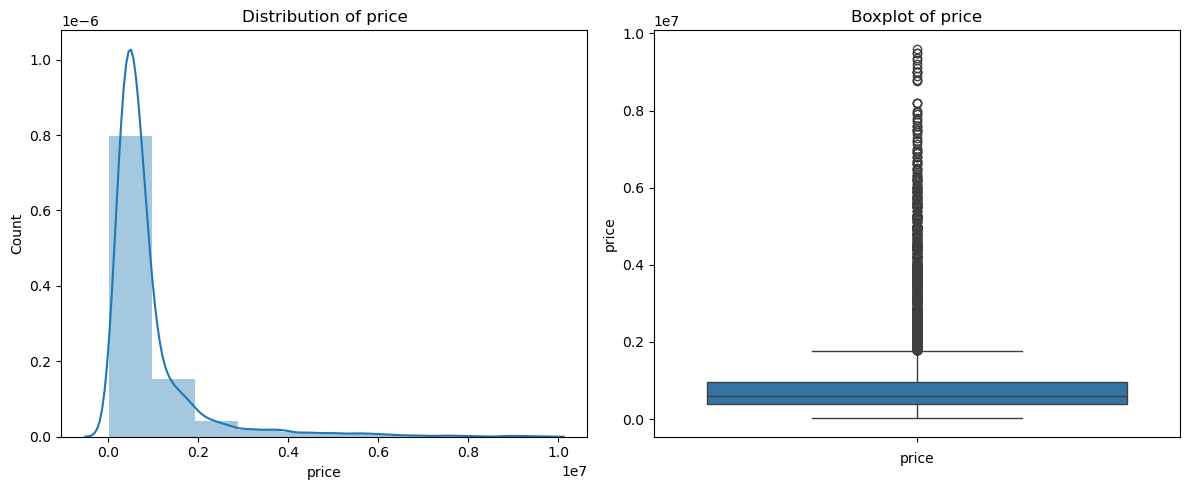

In [17]:
fig,axes=plt.subplots(1,2,figsize=(12,5))

# Distribution plot for the "price" column
sns.distplot(df['price'], kde=True, bins=10, ax=axes[0])
axes[0].set_title("Distribution of price")
axes[0].set_xlabel("price")
axes[0].set_ylabel("Count")

# Boxplot plot for the "price" column
sns.boxplot(data=df, y='price',ax=axes[1])
axes[1].set_title("Boxplot of price")
axes[1].set_xlabel("price")

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()

* Remove Outliers using IQR

In [18]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

Skewness: 1.023124
Kutosis: 0.820318


C:\Users\bhara\AppData\Local\Temp\ipykernel_27484\2422561171.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], kde=True, bins=10, ax=axes[0])


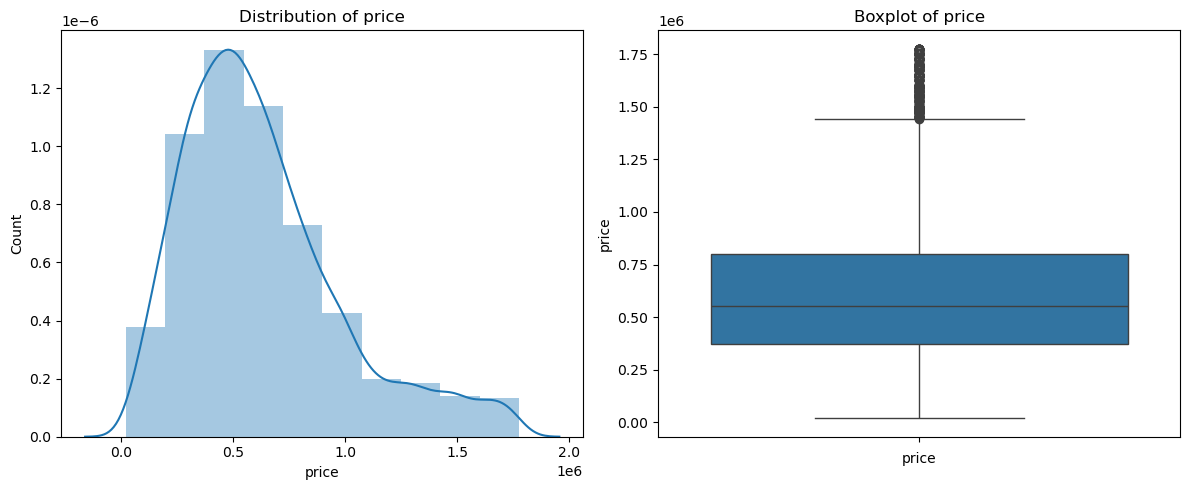

In [19]:
print('Skewness: %f' % df['price'].skew())
print('Kutosis: %f' % df['price'].kurt())

fig,axes=plt.subplots(1,2,figsize=(12,5))

# Distribution plot for the "price" column
sns.distplot(df['price'], kde=True, bins=10, ax=axes[0])
axes[0].set_title("Distribution of price")
axes[0].set_xlabel("price")
axes[0].set_ylabel("Count")

# Boxplot plot for the "price" column
sns.boxplot(data=df, y='price',ax=axes[1])
axes[1].set_title("Boxplot of price")
axes[1].set_xlabel("price")

# Adjust layout
plt.tight_layout()

##### Save Cleaned Dataset

In [20]:
# Save the cleaned data
df.to_csv(r"C:\Users\bhara\CarDheko\structured\car_dheko_cleaned_dataset.csv", index=False)

# Save preprocessing steps
joblib.dump(label_encoders, r"C:\Users\bhara\CarDheko\preprocessing\label_encoders.pkl")
joblib.dump(scalers, r"C:\Users\bhara\CarDheko\preprocessing\scalers.pkl")

print("Data cleaning complete. Cleaned dataset saved as 'car_dekho_cleaned_dataset.csv'.")
print("Preprocessing steps saved.")

Data cleaning complete. Cleaned dataset saved as 'car_dekho_cleaned_dataset.csv'.
Preprocessing steps saved.


###

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=6px>                   
                    <b>  EDA
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

##### Load Dataset

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned dataset with scaling
df_scaled = pd.read_csv(r"C:\Users\bhara\CarDheko\structured\car_dheko_cleaned_dataset.csv",low_memory=False)

##### Univariate Analysis

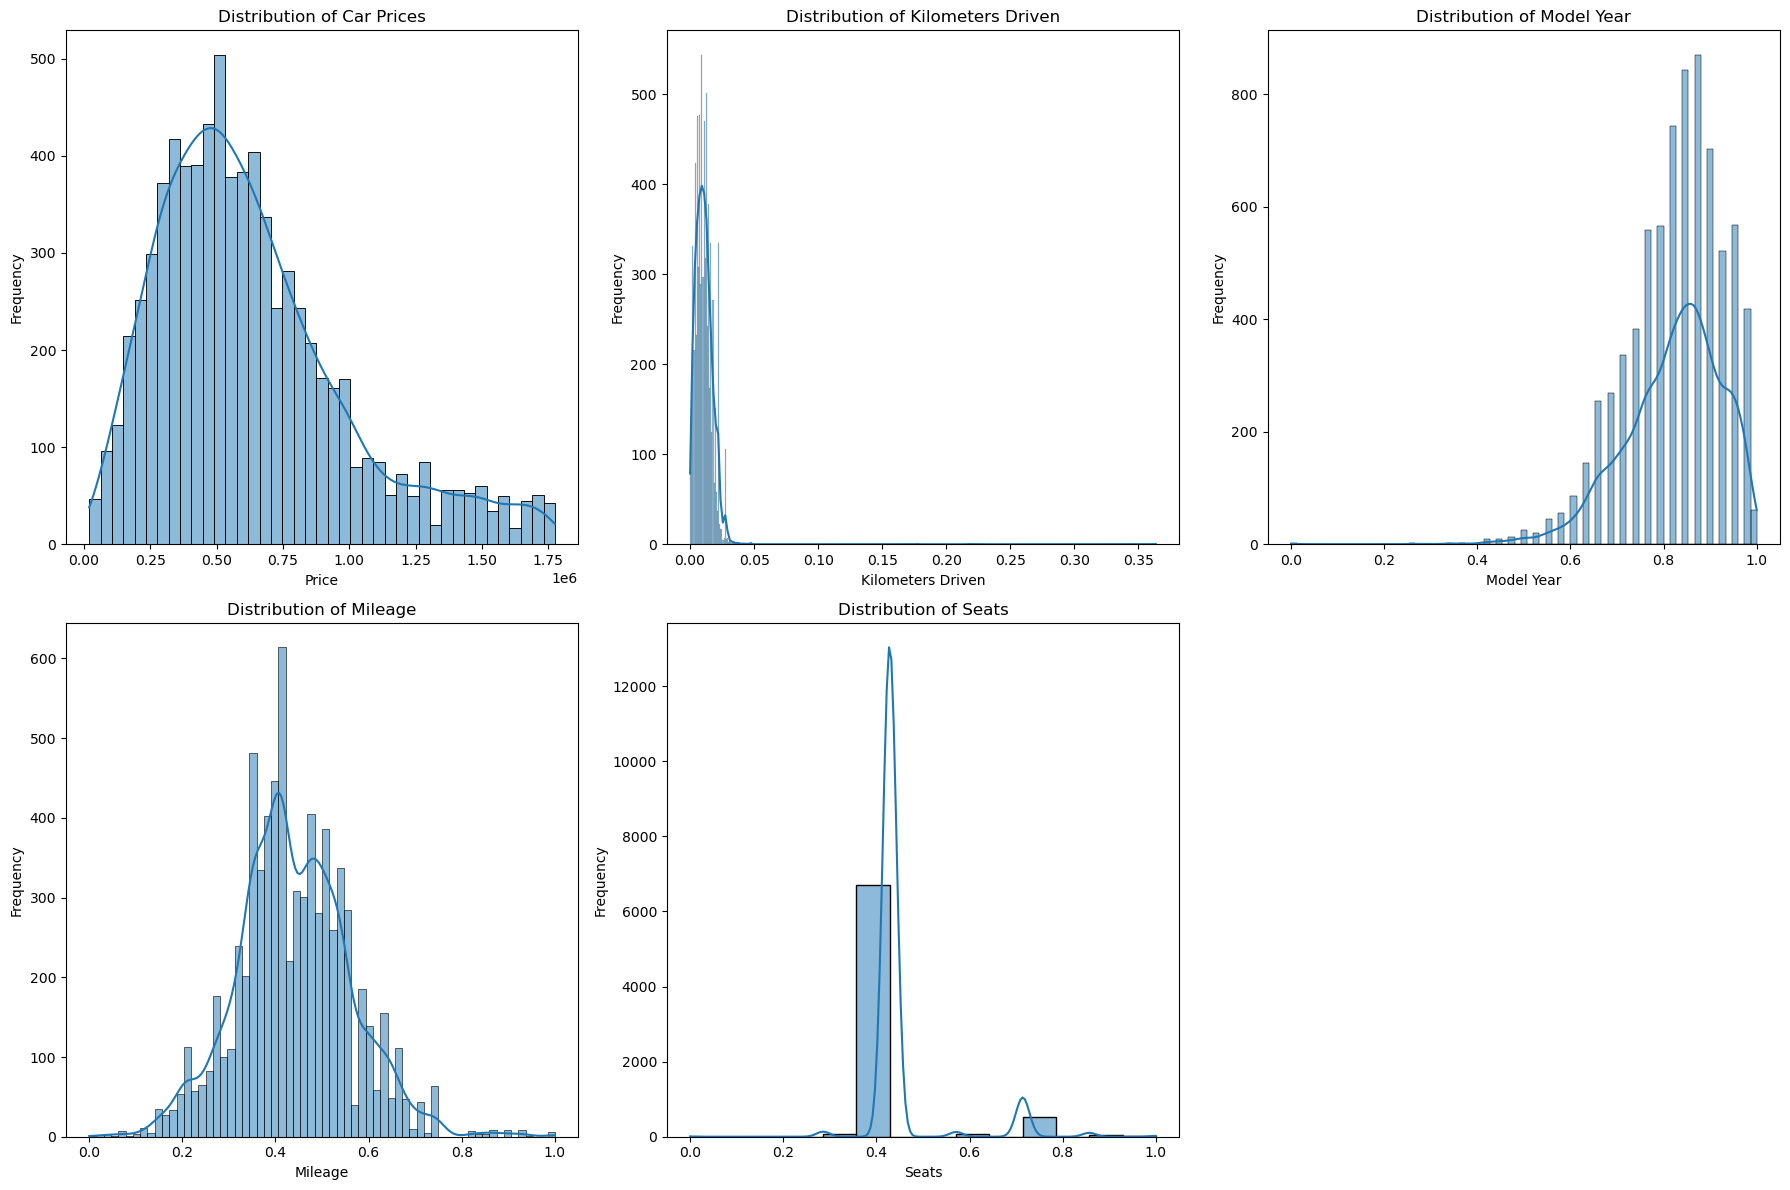

In [22]:
# Create a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribution Plot for Price
sns.histplot(df_scaled['price'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Car Prices')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Distribution Plot for Kilometers Driven
sns.histplot(df_scaled['km'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Kilometers Driven')
axes[0, 1].set_xlabel('Kilometers Driven')
axes[0, 1].set_ylabel('Frequency')

# Distribution Plot for Model Year
sns.histplot(df_scaled['modelYear'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Model Year')
axes[0, 2].set_xlabel('Model Year')
axes[0, 2].set_ylabel('Frequency')

# Distribution Plot for Mileage
sns.histplot(df_scaled['mileage'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Mileage')
axes[1, 0].set_xlabel('Mileage')
axes[1, 0].set_ylabel('Frequency')

# Distribution Plot for Seats
sns.histplot(df_scaled['Seats'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Seats')
axes[1, 1].set_xlabel('Seats')
axes[1, 1].set_ylabel('Frequency')

# Hide the empty subplot in the second row
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

* Distribution of Car Prices:  The histogram forms a bell-shaped distribution, with the highest frequency occurring just below 0.5 million. This suggests that most cars in the dataset are priced around the middle range, with fewer cars at both the lowest and highest price points.
* Distribution of KMs driven: The bars are skewed to the left, indicating a higher frequency of data points corresponds to lower kilometers driven
* Distribution of Model Year: The bars show a more uniform distribution across various model years, with some fluctuations
* Distribution of Mileage: The shape of the distribution is skewed to the right, with a peak around 0.4 mileage units. This suggests that a significant number of vehicles have relatively low mileage.
* Distribution of Seats: The histogram has a very tall peak around 0.4 seats units, indicating that many vehicles have a seating capacity around this value. There’s a smaller peak near 0.8 seats units, suggesting another common seating capacity.

##### Bivariate Analysis

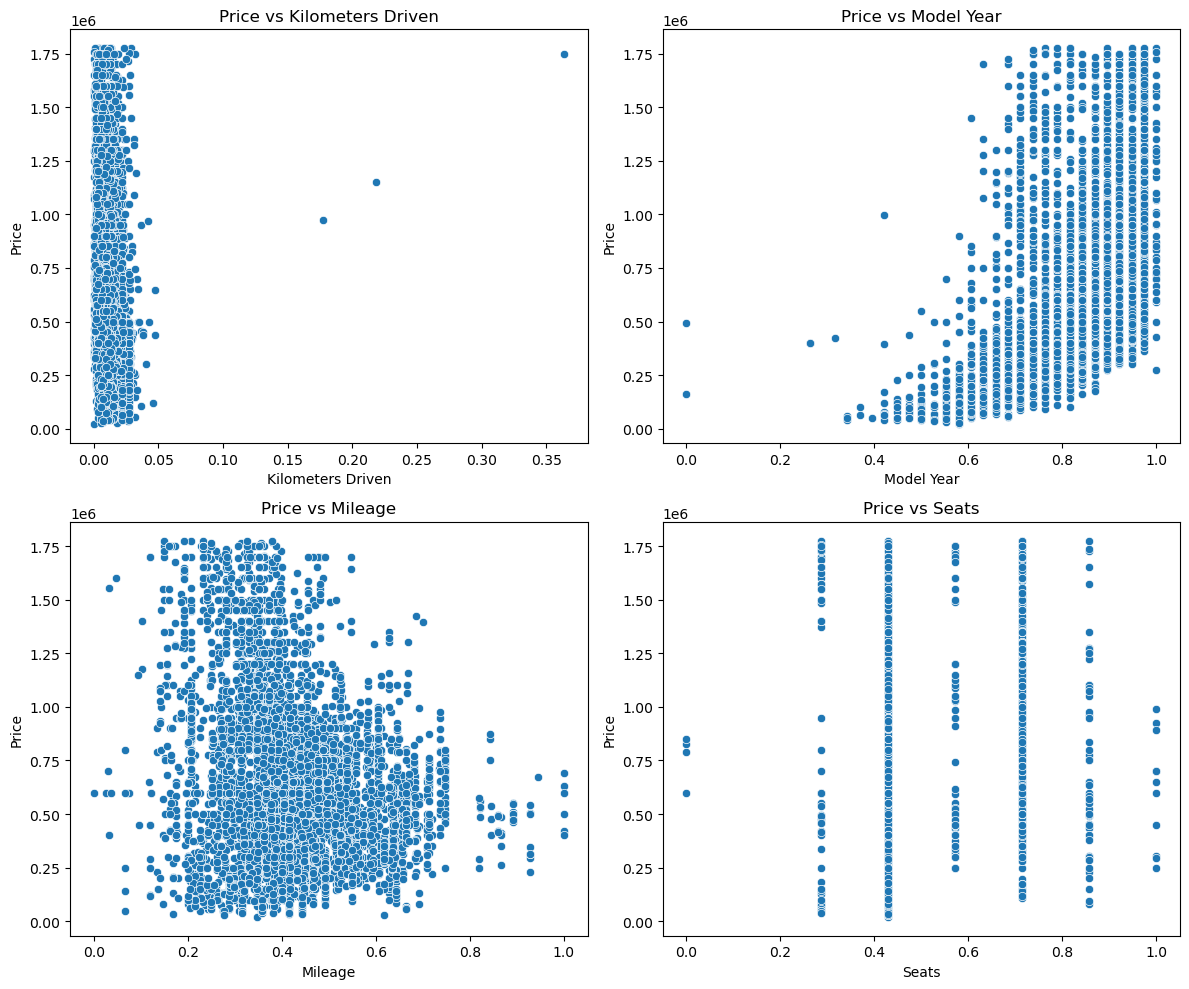

In [23]:
# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter Plot of Price vs Kilometers Driven
sns.scatterplot(x='km', y='price', data=df_scaled, ax=axes[0, 0])
axes[0, 0].set_title('Price vs Kilometers Driven')
axes[0, 0].set_xlabel('Kilometers Driven')
axes[0, 0].set_ylabel('Price')

# Scatter Plot of Price vs Model Year
sns.scatterplot(x='modelYear', y='price', data=df_scaled, ax=axes[0, 1])
axes[0, 1].set_title('Price vs Model Year')
axes[0, 1].set_xlabel('Model Year')
axes[0, 1].set_ylabel('Price')

# Scatter Plot of Price vs Mileage
sns.scatterplot(x='mileage', y='price', data=df_scaled, ax=axes[1, 0])
axes[1, 0].set_title('Price vs Mileage')
axes[1, 0].set_xlabel('Mileage')
axes[1, 0].set_ylabel('Price')

# Scatter Plot of Price vs Seats
sns.scatterplot(x='Seats', y='price', data=df_scaled, ax=axes[1, 1])
axes[1, 1].set_title('Price vs Seats')
axes[1, 1].set_xlabel('Seats')
axes[1, 1].set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()



* KMs vs Price: Lesser the KMs driven higher the price of the car. There is one datapoint indicating higher price for a car thats driven for longer. This could be an outlier or because of multicollinearity
* Model Year vs Price: Shows how the car valuation varies over the year; The price does not decrease with modelYear as it does not represent the age of the vehicle which needs to be calculated
* Same observations of multicollinerity with other features observed with Mileage and Seats feature

##### Skewness with respect to Price

In [24]:
# Select only numeric columns
df_numeric = df_scaled.select_dtypes(include=[np.number])
df_numeric.skew()

it                   0.000000
ft                  -0.937121
bt                   0.064170
km                  15.001293
transmission        -1.447425
ownerNo              1.840224
oem                  0.185572
model                0.445360
modelYear           -0.893260
centralVariantId     0.092715
variantName         -0.322192
price                1.023124
top_9_value         -0.674002
top_5_value.2        3.174163
City                 0.039576
mileage              0.283077
Seats                2.913854
dtype: float64

* bt, km, ownerNo, oem, model, centralVariantId, Price, top_5_value.2, City, mileage, Seats
  Postive Skewness indicates moderate to high right skewness indicating longer tail on the right side
  
* ft, transmission, modelYear, variantName, top_9_value, 
  Negative Skewness indicates moderate to high right skewness indicating longer tail on the left side

* it
  Near Zero Value indicates a nearly symmertical distribution

In [25]:
df_numeric.kurt()

it                    0.000000
ft                   -1.064089
bt                   -1.891187
km                  574.988639
transmission          0.095065
ownerNo               4.039529
oem                  -1.098556
model                -0.812141
modelYear             1.749890
centralVariantId     -1.030844
variantName          -1.275069
price                 0.820318
top_9_value           0.352429
top_5_value.2        11.558734
City                 -1.254211
mileage               0.864040
Seats                 9.152621
dtype: float64

* Negative Kurtosis with value closer to -1 indicates a relatively flat distribution 
* Positive Kurtosis indictes a distribution that is slightly more peaked than a normal distribution

##### Correlation of Independent Features with Dependent Features

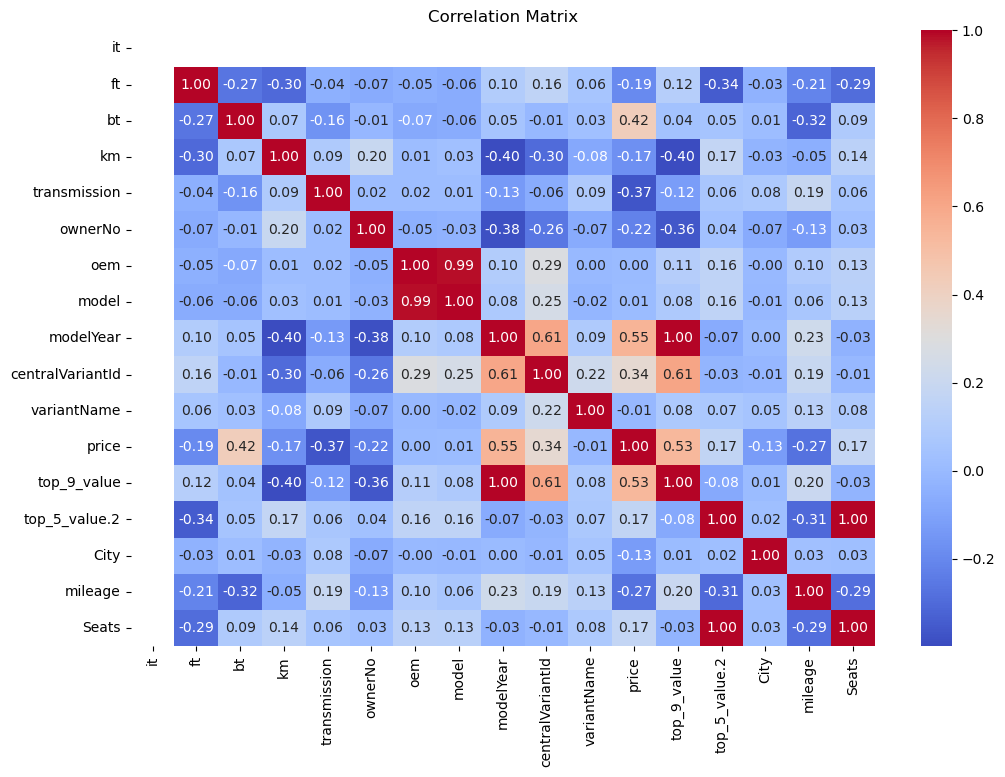

In [26]:
# Select only numeric columns
df_numeric = df_scaled.select_dtypes(include=[np.number])

# Correlation Matrix for the scaled data
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

* Negative Correlation with Price:
    Any increase in #Owners, Fuel Type, KM Driven, Transmission Type, Mileage and City will tend to lower car price
* Positive Correlation with Price:
    Specific 'Body Type', '#Seats' and newer 'Model Years' are associated with higher prices
* No Correlation:
    Low value of OEM indicates no significant correlation hence little impact on price. Included in the dataset because Brand Popularity which can be driven from OEM might positively impact price

##### Determining Importance-Features using ExtraTreeRegressor

[0.03577195 0.26242268 0.02959383 0.11154851 0.01682285 0.04953969
 0.06040143 0.25450566 0.05196832 0.03547751 0.06521009 0.02673749]


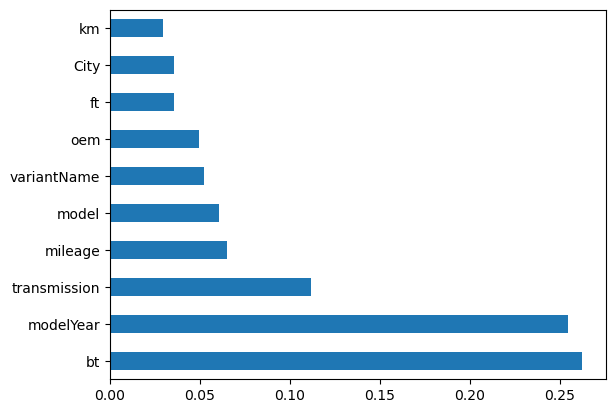

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

df_scaled = pd.read_csv(r"C:\Users\bhara\CarDheko\structured\car_dheko_cleaned_dataset.csv",low_memory=False)

X = df_scaled[['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName','City','mileage', 'Seats']]
y = df_scaled['price']

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

X = pd.DataFrame(X, columns=['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName','City','mileage', 'Seats'])
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

* modelYear and BT seems to have more importance to price prediction comparted to others
* None of them zero importance hence all of them will be used for Model Building and Evaluation

##### For Future Use

In [28]:
# Load the dataset
df = pd.read_csv(r"C:\Users\bhara\CarDheko\structured\car_dheko_structured.csv", low_memory=False)

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Helper function to convert price from various formats to float
def convert_price(price):
    try:
        price = str(price).replace('₹', '').replace(',', '').strip()
        if 'Lakh' in price:
            return float(price.replace('Lakh', '').strip()) * 100000
        else:
            return float(price)
    except ValueError:
        return np.nan

# Apply conversion function to the 'price' column
df['price'] = df['price'].apply(convert_price)

# Clean the 'km' column by removing commas and converting to integers
df['km'] = df['km'].str.replace('Kms', '').str.replace(',', '').astype(float)

# Fill missing values for numerical columns
df.fillna({
    'price': df['price'].median(),
    'ownerNo': df['ownerNo'].median(),
    'km': df['km'].median()
}, inplace=True)

# Remove the 'owner' column since it's the same as 'ownerNo'
df.drop(columns=['owner'], inplace=True)

# Clean and extract mileage from 'top_0_value.2' column and rename the column
def clean_mileage(mileage):
    try:
        mileage = str(mileage).replace('kmpl', '').replace('km/kg', '').strip()
        mileage_float = float(mileage)
        if mileage_float < 100:  # Assuming mileage values should be less than 100
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

df['mileage'] = df['top_0_value.2'].apply(clean_mileage)

# Clean and extract seats from 'top_3_value' column and rename the column
def clean_seats(seats):
    try:
        seats = str(seats).replace('Seats', '').strip()
        seats_int = int(seats)
        if seats_int < 10:  # Assuming seat values should be less than 10
            return seats_int
        else:
            return np.nan
    except ValueError:
        return np.nan

df['Seats'] = df['top_3_value'].apply(clean_seats)

# Drop the original columns 'top_0_value.2' and 'top_3_value'
df.drop(['top_0_value.2', 'top_3_value'], axis=1, inplace=True)

# Removing outliers using IQR for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Save the cleaned data
df.to_csv(r"C:\Users\bhara\CarDheko\structured\car_dheko_cleaned_dataset_raw.csv", index=False)

###

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=6px>                   
                    <b>  Model Building
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

##### Load Dataset

In [29]:
import pandas as pd

df = pd.read_csv(r"C:\Users\bhara\CarDheko\structured\car_dheko_cleaned_dataset.csv", low_memory=False)
df.head()

,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,mileage,Seats
0,0,1.00,0.2,0.021818,1.0,0.6,0.62500,0.509554,0.789474,3979,...,No Door Numbers,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,0.0,0.561711,0.428571
1,0,1.00,0.7,0.005947,1.0,0.4,0.18750,0.159236,0.868421,6087,...,Cargo Volumn,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0.0,0.347826,0.428571
2,0,1.00,0.2,0.002173,1.0,0.2,0.90625,0.869427,0.868421,2983,...,Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0.0,0.587658,0.428571
3,0,1.00,0.8,0.003235,1.0,0.2,0.28125,0.277070,0.763158,1867,...,Alloy Wheel Size,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0.0,0.421459,0.428571
4,0,0.25,0.7,0.010909,1.0,0.2,0.62500,0.566879,0.789474,4277,...,Alloy Wheel Size,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0.0,0.580996,0.428571


##### Splitting Dataset into Train and Test

* Train - Test split in the ratio of 80:20
* Price is the Target Feature and other chosen features as explained above are 'independent features'

In [30]:
# Train-Test Split
X = df[features_list].drop(columns=['price'])
y = df['price']

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (f"X_train: {X_train.shape}")
print (f"X_test: {X_test.shape}")
print (f"y_train: {y_train.shape}")
print (f"y_test: {y_test.shape}")

X_train: (6008, 12)
X_test: (1503, 12)
y_train: (6008,)
y_test: (1503,)


##### Linear Regression with Cross Validation and Ridge/Laso 

Linear Regression CV Mean MSE: 42911933968.485245
Linear Regression - MSE: 48351470014.41645, MAE: 158699.20287340673, R²: 0.6239615938705317
Training Score: 0.6707947493073732,  Testing Score: 0.6239615938705317


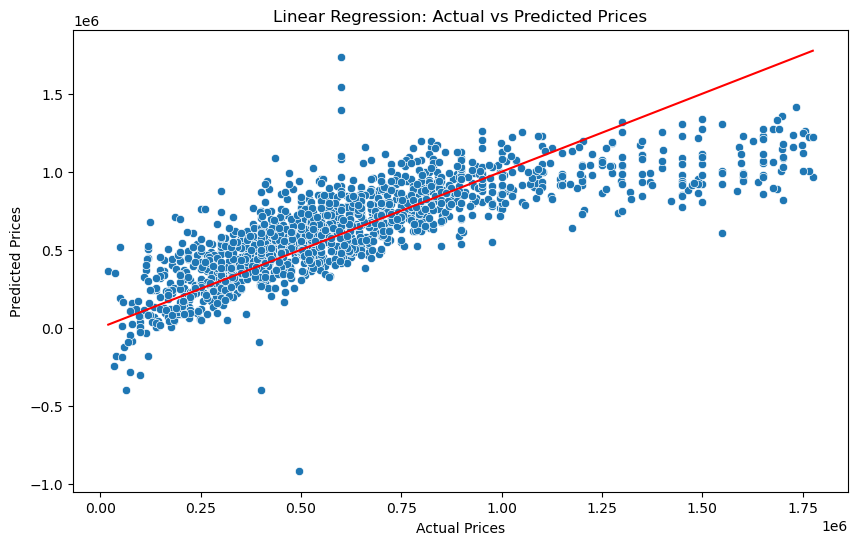

Best Ridge Alpha: {'alpha': 1}
Best Lasso Alpha: {'alpha': 100}


In [31]:
# Model Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Cross-Validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # How well the model performs on unseen data
print(f'Linear Regression CV Mean MSE: {-cv_scores.mean()}')

# Model Prediction
y_pred_lr = lr_model.predict(X_test)

# Model Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)          # MSE, MAE : Lower means closer prediction to the actual or better accuracy
mae_lr = mean_absolute_error(y_test, y_pred_lr)         # R²: How much of variance in target feature can be explained by the model; Closer to 1 is better
r2_lr = r2_score(y_test, y_pred_lr)

score_train_lr= lr_model.score(X_train,y_train)
score_test_lr = lr_model.score(X_test,y_test)

print(f'Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}')
print(f'Training Score: {score_train_lr},  Testing Score: {score_test_lr}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning for Ridge and Lasso using Grid Search
ridge = Ridge()                                                     
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print(f'Best Ridge Alpha: {ridge_grid.best_params_}')               # Higher alpha leads to stronger regularization

lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}                   
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print(f'Best Lasso Alpha: {lasso_grid.best_params_}')

* The red line represents the ideal scenario where predicted prices perfectly match actual prices. The blue dots represent individual data points.
  
* Interpretation:
  -- Dots closer to the red line indicate better predictions by the model.
  -- The spread of dots around the line shows variability in prediction accuracy.
  -- Observations above the line were underpredicted, while those below were overpredicted.

* Key Metrics Analysis:
  -- Higher MSE and MAE indicate the model predictions are not very accurate
  -- R² is little closer to 1 at 0.63 which indicates 62% of variance in Prices is explained by the Model

* Conclusion: Compare with performance of other models and apply domain knowledge to tweak the independent features and clean/normalize the data more

* Since the performance of the Linear Regression is not good enough, the below Regularization Techniques were applied:
  -- Ridge (L2 Regularization): was used as there are already multi-collinearity observed and there are many features that are irrelevant to price prediction
  -- Laso (L1 Regularization): was used to do feature selection and eliminate irrelevant features by driving their coefficients to zero
  -- The optimal value of alpha is found to be 1 and 100 for Ridge and Lasso respectively that contributed the higher performance of the model

* Cross Validation technique is applied and resultsed in a MSE of 42911933968.48586

* Model Accuracy Score below indicates training_accuracy is 67% and is > testing accuracy of 62%. This indicates an overfitting scenario as the model fails to perform well on unseen data.
  -- Training Score: 0.6707947493073732,  Testing Score: 0.62396159387054

##### Gradient Boosting with Cross-Validation and Hyperparameter Tuning (Random Search)

Gradient Boosting CV Mean MSE: 22130874896.192604
Gradient Boosting - MSE: 25124087574.233086, MAE: 108621.66049333247, R²: 0.804605282030621
Training Score: 0.8550815668559915,  Testing Score: 0.804605282030621


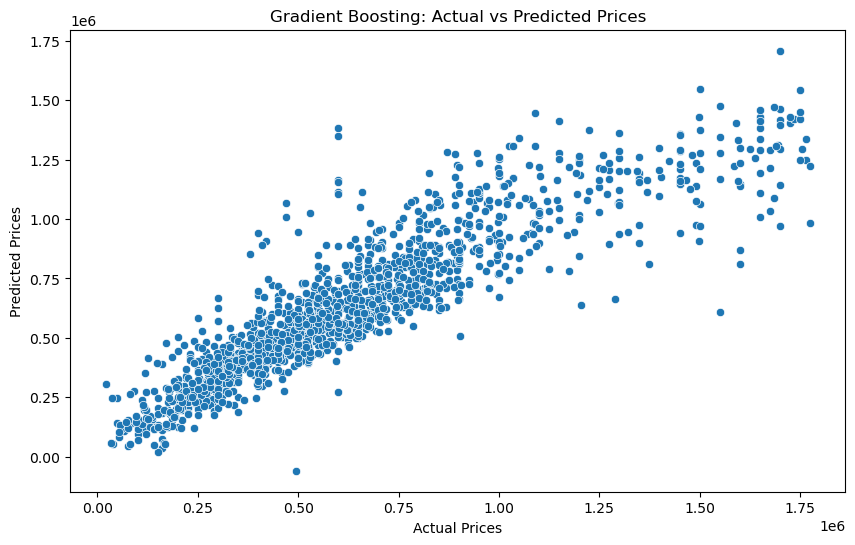

Best Gradient Boosting Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05}


In [32]:
# Model Training
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Cross-Validation
gbr_cv_scores = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Gradient Boosting CV Mean MSE: {-gbr_cv_scores.mean()}')

# Model Prediction
y_pred_gbr = gbr_model.predict(X_test)

# Model Evaluation
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

score_train_gbr= gbr_model.score(X_train,y_train)
score_test_gbr = gbr_model.score(X_test,y_test)

print(f'Gradient Boosting - MSE: {mse_gbr}, MAE: {mae_gbr}, R²: {r2_gbr}')
print(f'Training Score: {score_train_gbr},  Testing Score: {score_test_gbr}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
gbr_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
gbr_random = RandomizedSearchCV(gbr_model, gbr_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
gbr_random.fit(X_train, y_train)

print(f'Best Gradient Boosting Params: {gbr_random.best_params_}')

* Scatterplot: 
  -- It appears that 40% of the data points are clustered around the magical 45 degree magical line. Point above indicate overfitting and below underfitting

* Gradient Boost performed better in terms of R² but the MSE and MAE have indicated that the predictions are far from the actuals
  -- Gradient Boosting CV Mean MSE: 22136630104.477047
  -- Gradient Boosting MSE: 25131181718.328514, MAE: 108626.36730426234, R²: 0.8045501095480119

* Model Accuracy Score below indicates training_accuracy is 85% and is > testing accuracy of 80%. This indicates an overfitting scenario as the model fails to perform well on unseen data.
  -- Training Score: 0.8550815668559915,  Testing Score: 0.8045501095480119

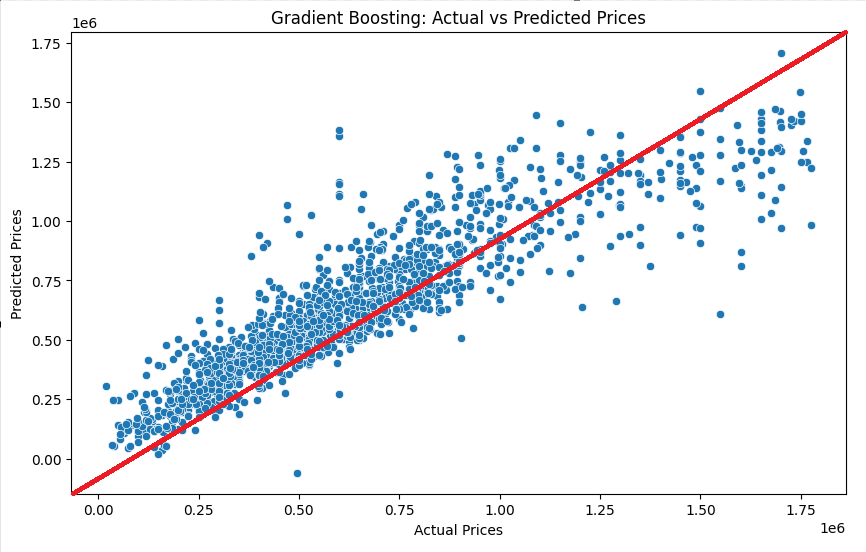

##### Decision Tree with Cross-Validation and Hyperparameter Tuning (Grid Search)

Decision Tree CV Mean MSE: 43148468987.89549
Decision Tree - MSE: 45922060695.05516, MAE: 152517.0616255033, R²: 0.6428555635474891
Training Score: 0.6808900701173062,  Testing Score: 0.6428555635474891


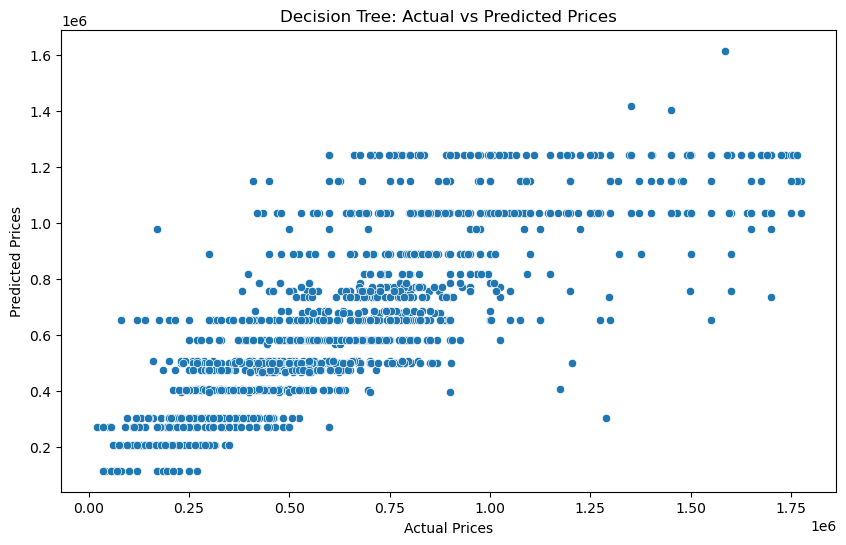

Best Decision Tree Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [33]:
# Model Training with Pruning
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Cross-Validation
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Decision Tree CV Mean MSE: {-dt_cv_scores.mean()}')

# Model Prediction
y_pred_dt = dt_model.predict(X_test)

# Model Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

score_train_dt= dt_model.score(X_train,y_train)
score_test_dt = dt_model.score(X_test,y_test)

print(f'Decision Tree - MSE: {mse_dt}, MAE: {mae_dt}, R²: {r2_dt}')
print(f'Training Score: {score_train_dt},  Testing Score: {score_test_dt}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Grid Search
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)

print(f'Best Decision Tree Params: {dt_grid.best_params_}')


* Scatterplot: 
  -- Every blue dots represent a data point which denotes horizontally the predicted price and vertically the actual price. Again, more these dots are closer to the 45 degree line, more the predictions are closer to the actual

* Performace Metrics
  -- Decision Tree CV Mean MSE: 43148468987.89549 & Decision Tree - MSE: 45922060695.05516, MAE: 152517.0616255033 are relatively high
  -- R²: 0.6428555635474891 is much better explaining 64% of variance in the target feature, Price

* GridSearchCV parameters for hyper parameter tuning: 

* Model Accuracy Score below indicates training_accuracy is 68% and is > testing accuracy of 64%. This indicates an overfitting scenario as the model fails to perform well on unseen data.
  -- Training Score: 0.6808900701173062,  Testing Score: 0.6428555635474891

##### Rerunning Decision Tree with Best Hyper Parameters

In [34]:
best_params = dt_grid.best_params_

# Create a new Decision Tree Regressor with the best parameters
best_tree_regressor = DecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
    # Add other hyperparameters as needed
)

best_tree_regressor.fit(X_train, y_train)

y_pred = best_tree_regressor.predict(X_test)

mse_btr = mean_squared_error(y_test, y_pred)
mae_btr = mean_absolute_error(y_test, y_pred)
r2_btr  = r2_score(y_test, y_pred)

score_train_btr= best_tree_regressor.score(X_train,y_train)
score_test_btr = best_tree_regressor.score(X_test,y_test)

print(f"MSE: {mse_btr:.2f}, MAE: {mae_btr:.2f}, R²: {r2_btr:.2f}")
print(f'Training Score: {score_train_btr},  Testing Score: {score_test_btr}')

MSE: 27020730652.16, MAE: 106386.35, R²: 0.79
Training Score: 0.896262132591048,  Testing Score: 0.7898547348434082


* With hyper parameter tuning, DecisionTreeRegressor has delivered an accuracy of 89.6% on the training data set and 79% on the testing dataset. However, issue of overfitting is found to be still existing.
  -- MSE: 27428511222.72, MAE: 107070.48, R²: 0.79
  -- Training Score: 0.896262132591048,  Testing Score: 0.7866833492421358

##### Random Forest with Cross-Validation and Hyperparameter Tuning (Random Search)

Random Forest CV Mean MSE: 15662681681.391459
Random Forest - MSE: 16377915978.30258, MAE: 78439.26650571873, R²: 0.8726258908288214
Training Score: 0.984143821717297,  Testing Score: 0.8726258908288214


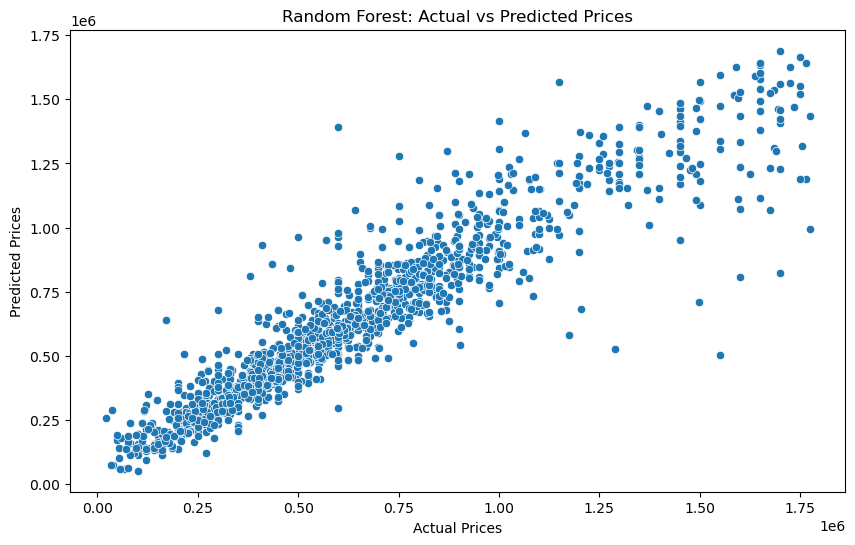

Best Random Forest Params: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}


In [35]:
# Model Training with Bagging
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model Prediction
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

score_train_rf= rf_model.score(X_train,y_train)
score_test_rf = rf_model.score(X_test,y_test)


print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')
print(f'Training Score: {score_train_rf},  Testing Score: {score_test_rf}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(rf_model, rf_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)

print(f'Best Random Forest Params: {rf_random.best_params_}')

* Random forest resulted in the best result thus far with R² of 87%
  -- Random Forest CV Mean MSE: 15667600296.473639
  -- Random Forest - MSE: 16355047213.350824, MAE: 78379.25153565884, R²: 0.8728037454818451

* Model Accuracy Score below indicates training_accuracy is 98% and is > testing accuracy of 87%. Model performs fairly well on both training and testing dataset though there is room for further improvement.
  -- Training Score: 0.984156931238626,  Testing Score: 0.8728037454818451

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Model Evaluation
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

###

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=6px>                   
                    <b>  Model Evaluation
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

##### Compare Model Performance

In [36]:
# Store model evaluation metrics
model_results = {
    'Model': ['Linear Regression', 'Gradient Boosting', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_gbr, mse_btr, mse_rf],
    'MAE': [mae_lr, mae_gbr, mae_btr, mae_rf],
    'R²': [r2_lr, r2_gbr, r2_btr, r2_rf],
    'Train Accuracy': [score_train_lr,score_train_gbr,score_train_btr,score_train_rf],
    'Test Accuracy': [score_test_lr,score_test_gbr,score_test_btr,score_test_rf]
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(model_results)

# Display the Model Comparison Table
print("Model Comparison Table:")
print(comparison_df.T,"\n\n")

# Identify the best model based on the highest R² and the lowest MSE/MAE
best_model_idx      = comparison_df['R²'].idxmax()
best_model_name     = comparison_df.loc[best_model_idx, 'Model']
best_model_mse      = comparison_df.loc[best_model_idx, 'MSE']
best_model_mae      = comparison_df.loc[best_model_idx, 'MAE']
best_model_r2       = comparison_df.loc[best_model_idx, 'R²']
best_model_tr_acc   = comparison_df.loc[best_model_idx, 'Train Accuracy']
best_model_tst_acc  = comparison_df.loc[best_model_idx, 'Test Accuracy']

# Print the summary of the best model
print("Best Model Summary:")
print("-------------------")
print(f"Best Model:      {best_model_name}")
print(f"MSE:             {best_model_mse}")
print(f"MAE:             {best_model_mae}")
print(f"R²:              {best_model_r2}")
print(f"Train Accuracy:  {best_model_tr_acc}")
print(f"Test Accuracy:   {best_model_tst_acc}")



Model Comparison Table:
                                 0                   1                   2  \
Model            Linear Regression   Gradient Boosting       Decision Tree   
MSE             48351470014.416451  25124087574.233086  27020730652.156364   
MAE                  158699.202873       108621.660493       106386.350431   
R²                        0.623962            0.804605            0.789855   
Train Accuracy            0.670795            0.855082            0.896262   
Test Accuracy             0.623962            0.804605            0.789855   

                                3  
Model               Random Forest  
MSE             16377915978.30258  
MAE                  78439.266506  
R²                       0.872626  
Train Accuracy           0.984144  
Test Accuracy            0.872626   


Best Model Summary:
-------------------
Best Model:      Random Forest
MSE:             16377915978.30258
MAE:             78439.26650571873
R²:              0.87262589082882

* Clearly Random Forest produces the best performance compared to all the other models used
* Now, with this model finalized as the model to use, further hyper parameter tuning, feature engineering and data normalization to be performed and model rerun 

###

<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=6px>                   
                    <b>  Run Finalized Model 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

##### ..... with additional Hyper Paramet Tuning and Data Standardization & Scaling 

Random Forest CV Mean MSE: 13611085720.848051
Random Forest - MSE: 13460079772.151579, MAE: 74266.41291747193, R²: 0.8953184475593764
Training Time: 529.5137329101562 seconds
Prediction Time: 0.18379783630371094 seconds
Older Cars - MSE: 4083324206.493178, MAE: 36376.12124428616, R²: 0.9683252098414983


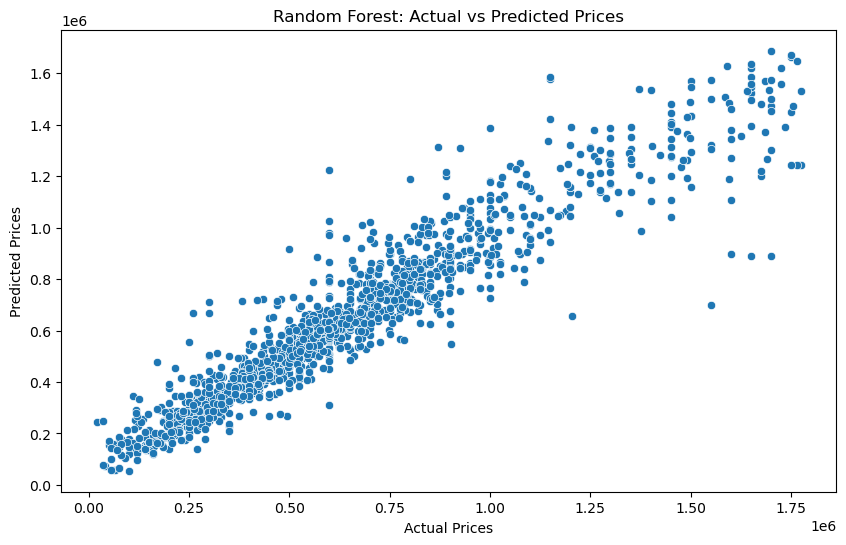

Model training complete. Model saved as 'car_price_prediction_model.pkl'.


In [37]:
# Load dataset
data = pd.read_csv(r"C:\Users\bhara\CarDheko\structured\car_dheko_cleaned_dataset.csv", low_memory=False)

# Load preprocessing steps
label_encoders = joblib.load(r"C:\Users\bhara\CarDheko\preprocessing\label_encoders.pkl")
scalers = joblib.load(r"C:\Users\bhara\CarDheko\preprocessing\scalers.pkl")

# Feature Engineering
data['car_age'] = 2024 - data['modelYear']
brand_popularity = data.groupby('oem')['price'].mean().to_dict()
data['brand_popularity'] = data['oem'].map(brand_popularity)
data['mileage_normalized'] = data['mileage'] / data['car_age']

# Define features and target
features = ['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear', 'variantName', 'City', 'mileage', 'Seats', 'car_age', 'brand_popularity', 'mileage_normalized']
X = data[features]
y = data['price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model with RandomizedSearchCV for hyperparameter tuning
rf_model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

start_time = time.time()
rf_random = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)
end_time = time.time()

# Best model
best_rf_model = rf_random.best_estimator_

# Cross-Validation
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model Prediction
start_predict_time = time.time()
y_pred_rf = best_rf_model.predict(X_test)
end_predict_time = time.time()

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')
print(f'Training Time: {end_time - start_time} seconds')
print(f'Prediction Time: {end_predict_time - start_predict_time} seconds')

# Evaluate on older cars
older_cars = data[data['car_age'] > 10]  # Assuming older cars are those older than 10 years
X_older = older_cars[features]
y_older = older_cars['price']

y_pred_older = best_rf_model.predict(X_older)
mse_older = mean_squared_error(y_older, y_pred_older)
mae_older = mean_absolute_error(y_older, y_pred_older)
r2_older = r2_score(y_older, y_pred_older)

print(f'Older Cars - MSE: {mse_older}, MAE: {mae_older}, R²: {r2_older}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Save the trained model
joblib.dump(best_rf_model, r"C:\Users\bhara\CarDheko\preprocessing\car_price_prediction_model.pkl")

print("Model training complete. Model saved as 'car_price_prediction_model.pkl'.")

###

<a id="conclusion"><a>
<table align="center" width=100%>
    <tr>
        <td>
            <div align="left">
                <font color="#21619" size=5px>                   
                    <b>  Conclusion  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In conclusion, after rigorous evaluation of various regression algorithms, including Linear Regression, Decision Tree, and Gradient Boosting, the Random Forest Regressor emerged as the optimal choice for predicting car prices. With consistently superior performance on both training and test data, the Random Forest model demonstrates robust generalization ability and reliable predictive accuracy. Its capacity to handle complex relationships and mitigate overfitting makes it a suitable tool for the task. Going forward, further hyperparameter tuning and exploration of feature importance will enhance the model's precision, providing valuable insights into the factors influencing car prices in the American market.